In [99]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [100]:
df = pd.read_csv("titanic.csv")

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [103]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [104]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
df = df.drop('Cabin',axis=1)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [107]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [108]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [109]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [110]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [111]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [112]:
df['Sex'] = df['Sex'].map({'male':1,'female':0})

In [113]:
df['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

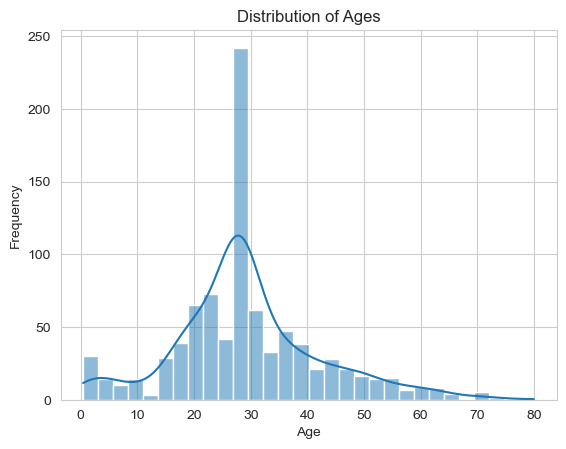

In [114]:
sns.set_style("whitegrid")
sns.histplot(df['Age'],bins=30,kde=True)
plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

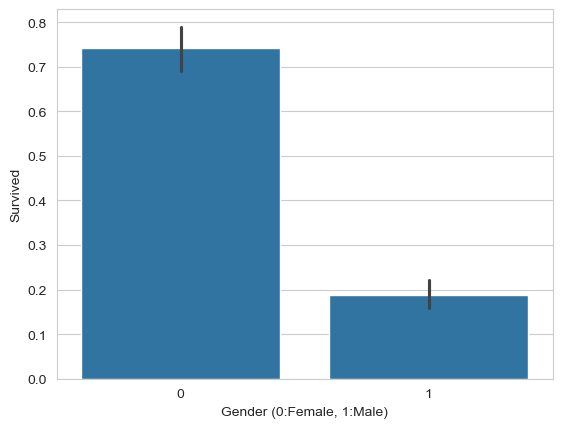

In [115]:
# plot the survival rate by gender
sns.barplot(x='Sex',y='Survived',data=df)
plt.xlabel("Gender (0:Female, 1:Male)")
plt.show()

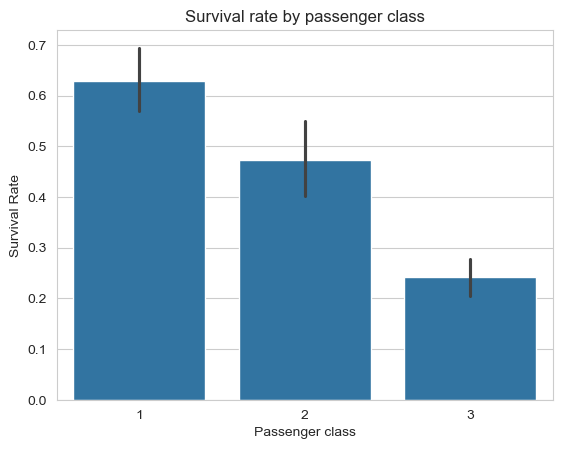

In [116]:
sns.barplot(x='Pclass',y='Survived',data=df)
plt.title("Survival rate by passenger class")
plt.xlabel("Passenger class")
plt.ylabel("Survival Rate")
plt.show()

In [117]:
df['AgeGroup'] = pd.cut(df['Age'],bins=[0,12,20,40,60,80],
labels = ['0-12','13-20','21-40','41-60','61-80'])

In [118]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
758,759,0,3,"Theobald, Mr. Thomas Leonard",1,34.0,0,0,363294,8.0500,S,21-40
683,684,0,3,"Goodwin, Mr. Charles Edward",1,14.0,5,2,CA 2144,46.9000,S,13-20
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",1,59.0,0,0,237442,13.5000,S,41-60
589,590,0,3,"Murdlin, Mr. Joseph",1,28.0,0,0,A./5. 3235,8.0500,S,21-40
352,353,0,3,"Elias, Mr. Tannous",1,15.0,1,1,2695,7.2292,C,13-20


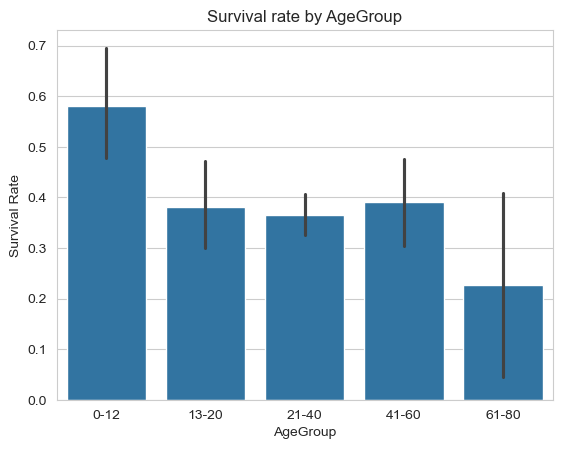

In [119]:
sns.barplot(x='AgeGroup',y='Survived',data=df)
plt.title("Survival rate by AgeGroup")
plt.xlabel("AgeGroup")
plt.ylabel("Survival Rate")
plt.show()

In [120]:
df['Embarked'] = df['Embarked'].astype('category').cat.codes
df['AgeGroup'] = df['AgeGroup'].cat.codes

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int8   
 11  AgeGroup     891 non-null    int8   
dtypes: float64(2), int64(6), int8(2), object(2)
memory usage: 71.5+ KB


In [122]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
397,398,0,2,"McKane, Mr. Peter David",1,46.0,0,0,28403,26.0000,2,3
124,125,0,1,"White, Mr. Percival Wayland",1,54.0,0,1,35281,77.2875,2,3
805,806,0,3,"Johansson, Mr. Karl Johan",1,31.0,0,0,347063,7.7750,2,2
694,695,0,1,"Weir, Col. John",1,60.0,0,0,113800,26.5500,2,3
181,182,0,2,"Pernot, Mr. Rene",1,28.0,0,0,SC/PARIS 2131,15.0500,0,2
663,664,0,3,"Coleff, Mr. Peju",1,36.0,0,0,349210,7.4958,2,2
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,1,2
716,717,1,1,"Endres, Miss. Caroline Louise",0,38.0,0,0,PC 17757,227.5250,0,2
79,80,1,3,"Dowdell, Miss. Elizabeth",0,30.0,0,0,364516,12.4750,2,2
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",0,6.0,4,2,347082,31.2750,2,0


In [123]:
df.shape

(891, 12)

In [124]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked          int8
AgeGroup          int8
dtype: object

In [125]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup'],
      dtype='object')

In [126]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,2


In [127]:
df["FamilySize"] = df['SibSp'] + df['Parch'] + 1

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int8   
 11  AgeGroup     891 non-null    int8   
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(7), int8(2), object(2)
memory usage: 78.4+ KB


In [129]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup', 'FamilySize'],
      dtype='object')

In [146]:
features = ['Pclass','Sex','Age','Fare','Embarked','FamilySize']
X = df[features]
y = df['Survived']
X_featureImp = df.drop(columns=['Survived','Name','Ticket'])

In [147]:
X_featureImp.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FamilySize
0,1,3,1,22.0,1,0,7.2500,2,2,2
1,2,1,0,38.0,1,0,71.2833,0,2,2
2,3,3,0,26.0,0,0,7.9250,2,2,1
3,4,1,0,35.0,1,0,53.1000,2,2,2
4,5,3,1,35.0,0,0,8.0500,2,2,1


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_preds = rfc.predict(X_test)
print(accuracy_score(y_test,y_preds))

0.7988826815642458


# PLOT CONFUSION MATRIX AND FEATURE IMPORTANCE 


In [133]:
from sklearn.metrics import classification_report,confusion_matrix


In [134]:
cm = confusion_matrix(y_test,y_preds,labels=[1,0])
print(cm)

[[55 19]
 [17 88]]


In [135]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



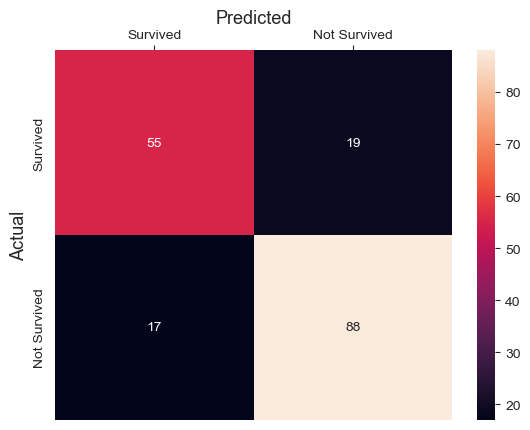

In [136]:
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['Survived','Not Survived']
            ,yticklabels=['Survived','Not Survived'])
plt.xlabel("Predicted",fontsize=13)
plt.ylabel("Actual",fontsize=13)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.show()

# Plotting feature importance using random forest classifier 

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int8   
 11  AgeGroup     891 non-null    int8   
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(7), int8(2), object(2)
memory usage: 78.4+ KB


In [149]:
X_train,X_test,y_train,y_test = train_test_split(X_featureImp,y,test_size=0.2,random_state=42)
clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [150]:
importances = rfc.feature_importances_
importances

array([0.08699561, 0.2680725 , 0.25664342, 0.28099847, 0.02994562,
       0.07734438])

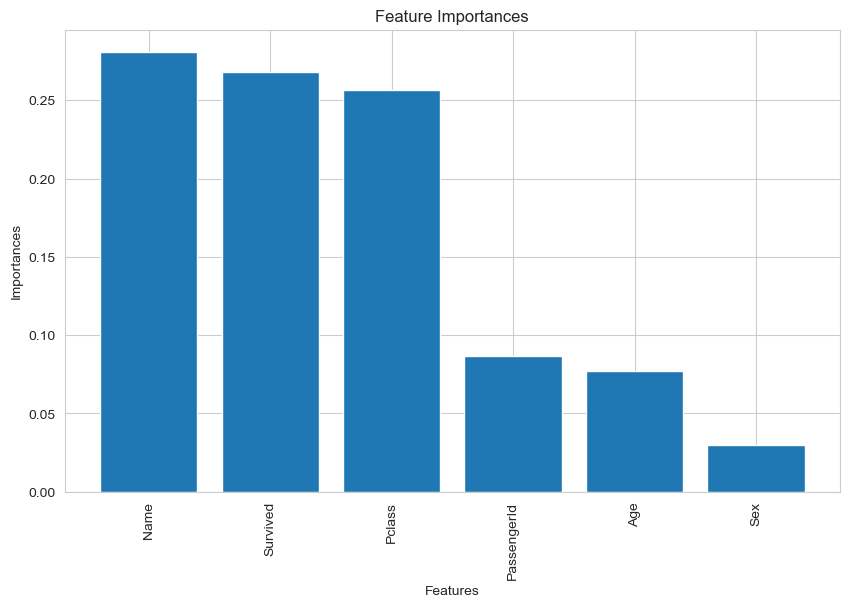

In [156]:
# sort feature importances in descending order
indices = np.argsort(importances)[::-1]
names = [df.columns[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]),importances[indices])
plt.xticks(range(X.shape[1]),names,rotation=90)
plt.xlabel("Features")
plt.ylabel("Importances")
plt.show()